In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from binaryclassifier import BinaryClassifier
from train import train
from torchvision import transforms, datasets
import numpy as np
from torch.utils.data import DataLoader, SubsetRandomSampler
"""
import matplotlib.pyplot as plt
from torchvision import utils
"""

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device: ", device)

image_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

def train_model(name, dataset_root, image_count):
    new_dataset = datasets.ImageFolder(root=dataset_root, transform=image_transforms)
    new_dataset_size = image_count  # len(new_dataset)
    new_dataset_size_indices = list(range(new_dataset_size))
    np.random.shuffle(new_dataset_size_indices)
    val_split_index = int(np.floor(0.2 * new_dataset_size))  # 80% train, 20% validation
    train_idx, val_idx = new_dataset_size_indices[val_split_index:new_dataset_size], new_dataset_size_indices[:val_split_index]
    train_loader = DataLoader(dataset=new_dataset, shuffle=False, batch_size=4, sampler=SubsetRandomSampler(train_idx))
    val_loader = DataLoader(dataset=new_dataset, shuffle=False, batch_size=1, sampler=SubsetRandomSampler(val_idx))
    
    """
    single_batch = next(iter(train_loader))
    single_batch_grid = utils.make_grid(single_batch[0], nrow=4)
    plt.figure(figsize = (10,10))
    plt.imshow(single_batch_grid.permute(1, 2, 0))
    """
    
    model = BinaryClassifier()
    model.to(device)
    print(model)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    accuracy_stats, loss_stats = train(model, device, train_loader, val_loader, criterion, optimizer, epoch=20)
    torch.save(model, f'{name}.pt')
    
    return accuracy_stats, loss_stats

Device:  cuda


BinaryClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
  (conv4): Conv2d(64, 2, kernel_size=(32, 32), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


  5%|▌         | 1/20 [00:21<06:57, 21.97s/it]

Epoch 1: | Train Loss: 36.54123 | Val Loss: 17.75687 | Train Acc: 50.000| Val Acc: 36.364


 10%|█         | 2/20 [00:29<04:07, 13.76s/it]

Epoch 2: | Train Loss: 16.31461 | Val Loss: 15.15005 | Train Acc: 54.545| Val Acc: 45.455


 15%|█▌        | 3/20 [00:37<03:01, 10.69s/it]

Epoch 3: | Train Loss: 7.68941 | Val Loss: 6.22530 | Train Acc: 72.727| Val Acc: 81.818


 20%|██        | 4/20 [00:44<02:30,  9.43s/it]

Epoch 4: | Train Loss: 4.17934 | Val Loss: 12.95367 | Train Acc: 81.818| Val Acc: 63.636


 25%|██▌       | 5/20 [00:52<02:14,  8.94s/it]

Epoch 5: | Train Loss: 5.42171 | Val Loss: 1.32102 | Train Acc: 75.000| Val Acc: 81.818


 30%|███       | 6/20 [01:00<02:00,  8.59s/it]

Epoch 6: | Train Loss: 1.00099 | Val Loss: 0.74201 | Train Acc: 90.909| Val Acc: 81.818


 35%|███▌      | 7/20 [01:08<01:47,  8.28s/it]

Epoch 7: | Train Loss: 1.02899 | Val Loss: 3.18952 | Train Acc: 88.636| Val Acc: 90.909


 40%|████      | 8/20 [01:16<01:38,  8.19s/it]

Epoch 8: | Train Loss: 1.25993 | Val Loss: 2.88602 | Train Acc: 90.909| Val Acc: 81.818


 45%|████▌     | 9/20 [01:23<01:28,  8.05s/it]

Epoch 9: | Train Loss: 1.09196 | Val Loss: 2.67465 | Train Acc: 95.455| Val Acc: 81.818


 50%|█████     | 10/20 [01:31<01:20,  8.03s/it]

Epoch 10: | Train Loss: 3.43955 | Val Loss: 2.23542 | Train Acc: 84.091| Val Acc: 90.909


 55%|█████▌    | 11/20 [01:39<01:11,  7.94s/it]

Epoch 11: | Train Loss: 1.39529 | Val Loss: 5.03146 | Train Acc: 90.909| Val Acc: 72.727


 60%|██████    | 12/20 [01:47<01:03,  7.97s/it]

Epoch 12: | Train Loss: 0.50118 | Val Loss: 3.33707 | Train Acc: 97.727| Val Acc: 90.909


 65%|██████▌   | 13/20 [01:55<00:55,  7.95s/it]

Epoch 13: | Train Loss: 0.00000 | Val Loss: 1.03964 | Train Acc: 100.000| Val Acc: 81.818


 70%|███████   | 14/20 [02:03<00:47,  7.92s/it]

Epoch 14: | Train Loss: 0.00000 | Val Loss: 1.69103 | Train Acc: 100.000| Val Acc: 81.818


 75%|███████▌  | 15/20 [02:11<00:39,  7.91s/it]

Epoch 15: | Train Loss: 0.83302 | Val Loss: 7.45011 | Train Acc: 95.455| Val Acc: 90.909


 80%|████████  | 16/20 [02:19<00:31,  7.97s/it]

Epoch 16: | Train Loss: 0.02595 | Val Loss: 1.83498 | Train Acc: 97.727| Val Acc: 81.818


 85%|████████▌ | 17/20 [02:27<00:23,  7.94s/it]

Epoch 17: | Train Loss: 0.46906 | Val Loss: 2.34361 | Train Acc: 95.455| Val Acc: 81.818


 90%|█████████ | 18/20 [02:37<00:17,  8.54s/it]

Epoch 18: | Train Loss: 0.00560 | Val Loss: 6.32910 | Train Acc: 100.000| Val Acc: 90.909


 95%|█████████▌| 19/20 [02:51<00:10, 10.20s/it]

Epoch 19: | Train Loss: 0.73808 | Val Loss: 6.29562 | Train Acc: 95.455| Val Acc: 90.909


100%|██████████| 20/20 [03:07<00:00,  9.40s/it]


Epoch 20: | Train Loss: 0.36998 | Val Loss: 0.72557 | Train Acc: 97.727| Val Acc: 90.909


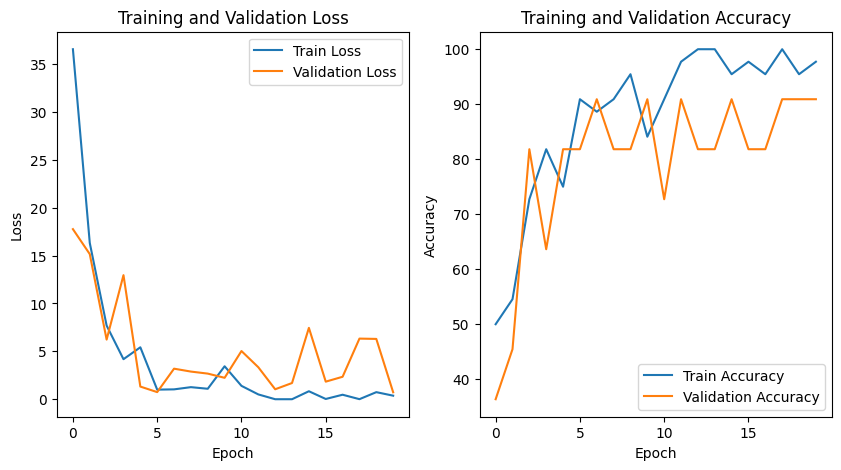

In [3]:
from train import visualize
import matplotlib.pyplot as plt

coast_stats = train_model('coast', './datasets/seongsan/coast', image_count=55)
visualize(*coast_stats, savefig_name='coast.png')
plt.show()

BinaryClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
  )
  (conv4): Conv2d(64, 2, kernel_size=(32, 32), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


  5%|▌         | 1/20 [00:19<06:05, 19.26s/it]

Epoch 1: | Train Loss: 15.88383 | Val Loss: 29.70086 | Train Acc: 54.545| Val Acc: 45.455


 10%|█         | 2/20 [00:34<05:02, 16.82s/it]

Epoch 2: | Train Loss: 15.26699 | Val Loss: 49.52401 | Train Acc: 68.182| Val Acc: 45.455


 15%|█▌        | 3/20 [00:53<05:02, 17.81s/it]

Epoch 3: | Train Loss: 12.95687 | Val Loss: 16.17436 | Train Acc: 70.455| Val Acc: 81.818


 20%|██        | 4/20 [01:13<05:01, 18.86s/it]

Epoch 4: | Train Loss: 6.04000 | Val Loss: 1.92465 | Train Acc: 81.818| Val Acc: 81.818


 25%|██▌       | 5/20 [01:31<04:36, 18.42s/it]

Epoch 5: | Train Loss: 3.44705 | Val Loss: 3.81949 | Train Acc: 84.091| Val Acc: 63.636


 30%|███       | 6/20 [01:52<04:31, 19.38s/it]

Epoch 6: | Train Loss: 1.45946 | Val Loss: 0.36418 | Train Acc: 84.091| Val Acc: 81.818


 35%|███▌      | 7/20 [02:10<04:05, 18.90s/it]

Epoch 7: | Train Loss: 0.27827 | Val Loss: 0.59498 | Train Acc: 97.727| Val Acc: 90.909


 40%|████      | 8/20 [02:30<03:49, 19.14s/it]

Epoch 8: | Train Loss: 0.32244 | Val Loss: 0.00304 | Train Acc: 93.182| Val Acc: 100.000


 45%|████▌     | 9/20 [02:48<03:29, 19.01s/it]

Epoch 9: | Train Loss: 0.00014 | Val Loss: 2.57834 | Train Acc: 100.000| Val Acc: 81.818


 50%|█████     | 10/20 [03:08<03:11, 19.11s/it]

Epoch 10: | Train Loss: 0.81780 | Val Loss: 0.00554 | Train Acc: 95.455| Val Acc: 100.000


 55%|█████▌    | 11/20 [03:27<02:52, 19.12s/it]

Epoch 11: | Train Loss: 0.85373 | Val Loss: 2.09437 | Train Acc: 90.909| Val Acc: 63.636


 60%|██████    | 12/20 [03:46<02:33, 19.17s/it]

Epoch 12: | Train Loss: 0.05534 | Val Loss: 0.37945 | Train Acc: 97.727| Val Acc: 90.909


 65%|██████▌   | 13/20 [04:06<02:15, 19.37s/it]

Epoch 13: | Train Loss: 0.00820 | Val Loss: 0.00603 | Train Acc: 100.000| Val Acc: 100.000


 70%|███████   | 14/20 [04:25<01:56, 19.39s/it]

Epoch 14: | Train Loss: 0.00000 | Val Loss: 0.01456 | Train Acc: 100.000| Val Acc: 100.000


 75%|███████▌  | 15/20 [04:45<01:36, 19.30s/it]

Epoch 15: | Train Loss: 0.00014 | Val Loss: 0.03429 | Train Acc: 100.000| Val Acc: 100.000


 80%|████████  | 16/20 [05:03<01:16, 19.13s/it]

Epoch 16: | Train Loss: 0.00010 | Val Loss: 0.05460 | Train Acc: 100.000| Val Acc: 100.000


 85%|████████▌ | 17/20 [05:25<00:59, 19.75s/it]

Epoch 17: | Train Loss: 0.00001 | Val Loss: 0.04154 | Train Acc: 100.000| Val Acc: 100.000


 90%|█████████ | 18/20 [05:44<00:39, 19.59s/it]

Epoch 18: | Train Loss: 0.00121 | Val Loss: 0.01258 | Train Acc: 100.000| Val Acc: 100.000


 95%|█████████▌| 19/20 [06:01<00:19, 19.02s/it]

Epoch 19: | Train Loss: 0.00001 | Val Loss: 0.00476 | Train Acc: 100.000| Val Acc: 100.000


100%|██████████| 20/20 [06:13<00:00, 18.66s/it]

Epoch 20: | Train Loss: 0.00000 | Val Loss: 0.00367 | Train Acc: 100.000| Val Acc: 100.000


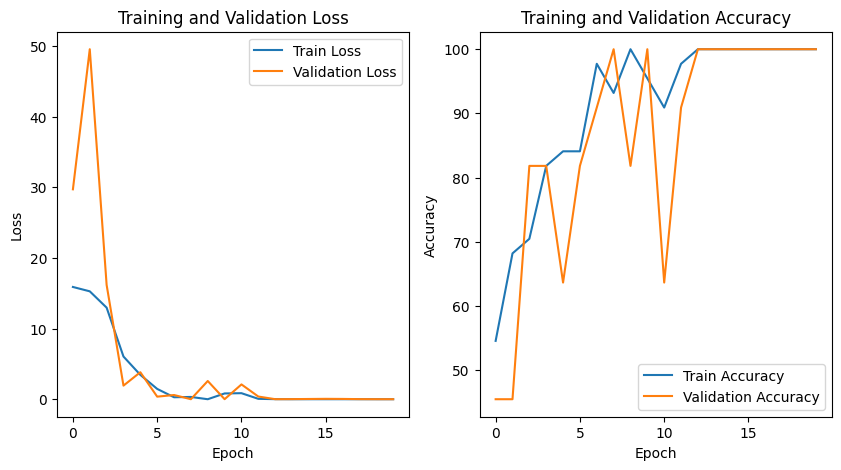

In [4]:
sand_stats = train_model('sand', './datasets/seongsan/sand', image_count=55)
visualize(*sand_stats, savefig_name='sand.png')
plt.show()